In [113]:
%load_ext autoreload
%autoreload 2

In [115]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skl

import IPython.display as ipd
from src.plots import *
from src import utils

In [171]:
plt.style.use('ggplot')

In [3]:
# Load metadata and features.
tracks = utils.load('data/fma_metadata/tracks.csv')
genres = utils.load('data/fma_metadata/genres.csv')
features = utils.load('data/fma_metadata/features.csv')
echonest = utils.load('data/fma_metadata/echonest.csv')

np.testing.assert_array_equal(features.index, tracks.index)
assert echonest.index.isin(tracks.index).all()

tracks.shape, genres.shape, features.shape, echonest.shape

((106574, 52), (163, 4), (106574, 518), (13129, 249))

In [16]:
tracks['track'].genre_top.value_counts()

Rock                   14182
Experimental           10608
Electronic              9372
Hip-Hop                 3552
Folk                    2803
Pop                     2332
Instrumental            2079
International           1389
Classical               1230
Jazz                     571
Old-Time / Historic      554
Spoken                   423
Country                  194
Soul-RnB                 175
Blues                    110
Easy Listening            24
Name: genre_top, dtype: int64

In [20]:
echonest_tracks = tracks.loc[echonest.index].join(echonest['echonest'][['audio_features', 'temporal_features']])

In [ ]:
features_echonest = echonest['echonest'][['audio_features', 'temporal_features']].join(features.loc[echonest.index])

In [24]:
full_df = echonest_tracks.join(features.loc[echonest.index])

/Users/alextsai/anaconda3/lib/python3.7/site-packages/pandas/core/reshape/merge.py:618: UserWarning: merging between different levels can give an unintended result (2 levels on the left, 3 on the right)
  warnings.warn(msg, UserWarning)


In [27]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13129 entries, 2 to 124911
Columns: 802 entries, ('album', 'comments') to ('zcr', 'std')
dtypes: category(6), datetime64[ns](7), float64(752), int64(15), object(22)
memory usage: 81.2+ MB


In [43]:
[row[0] for row in  features.columns]

['chroma_cens',
 'chroma_cens',
 'chroma_cens',
 'chroma_cens',
 'chroma_cens',
 'chroma_cens',
 'chroma_cens',
 'chroma_cens',
 'chroma_cens',
 'chroma_cens',
 'chroma_cens',
 'chroma_cens',
 'chroma_cens',
 'chroma_cens',
 'chroma_cens',
 'chroma_cens',
 'chroma_cens',
 'chroma_cens',
 'chroma_cens',
 'chroma_cens',
 'chroma_cens',
 'chroma_cens',
 'chroma_cens',
 'chroma_cens',
 'chroma_cens',
 'chroma_cens',
 'chroma_cens',
 'chroma_cens',
 'chroma_cens',
 'chroma_cens',
 'chroma_cens',
 'chroma_cens',
 'chroma_cens',
 'chroma_cens',
 'chroma_cens',
 'chroma_cens',
 'chroma_cens',
 'chroma_cens',
 'chroma_cens',
 'chroma_cens',
 'chroma_cens',
 'chroma_cens',
 'chroma_cens',
 'chroma_cens',
 'chroma_cens',
 'chroma_cens',
 'chroma_cens',
 'chroma_cens',
 'chroma_cens',
 'chroma_cens',
 'chroma_cens',
 'chroma_cens',
 'chroma_cens',
 'chroma_cens',
 'chroma_cens',
 'chroma_cens',
 'chroma_cens',
 'chroma_cens',
 'chroma_cens',
 'chroma_cens',
 'chroma_cens',
 'chroma_cens',
 'chroma

In [ ]:
[row[0] for row in echonest['echonest'].columns]

In [56]:
echonest.echonest.audio_features

,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence
track_id,,,,,,,,
2,0.416675,0.675894,0.634476,0.010628,0.177647,0.159310,165.922,0.576661
3,0.374408,0.528643,0.817461,0.001851,0.105880,0.461818,126.957,0.269240
5,0.043567,0.745566,0.701470,0.000697,0.373143,0.124595,100.260,0.621661
10,0.951670,0.658179,0.924525,0.965427,0.115474,0.032985,111.562,0.963590
134,0.452217,0.513238,0.560410,0.019443,0.096567,0.525519,114.290,0.894072
...,...,...,...,...,...,...,...,...
124857,0.007592,0.790364,0.719288,0.853114,0.720715,0.082550,141.332,0.890461
124862,0.041498,0.843077,0.536496,0.865151,0.547949,0.074001,101.975,0.476845
124863,0.000124,0.609686,0.895136,0.846624,0.632903,0.051517,129.996,0.496667


In [133]:
hip_hop_df = echonest_tracks[echonest_tracks.track.genre_top == 'Hip-Hop']
rock_df = echonest_tracks[echonest_tracks.track.genre_top == 'Rock']
classical_df = echonest_tracks[echonest_tracks.track.genre_top == 'Classical']
pop_df = echonest_tracks[echonest_tracks.track.genre_top == 'Pop']
electronic_df = echonest_tracks[echonest_tracks.track.genre_top == 'Electronic']
folk_df = echonest_tracks[echonest_tracks.track.genre_top == 'Folk']

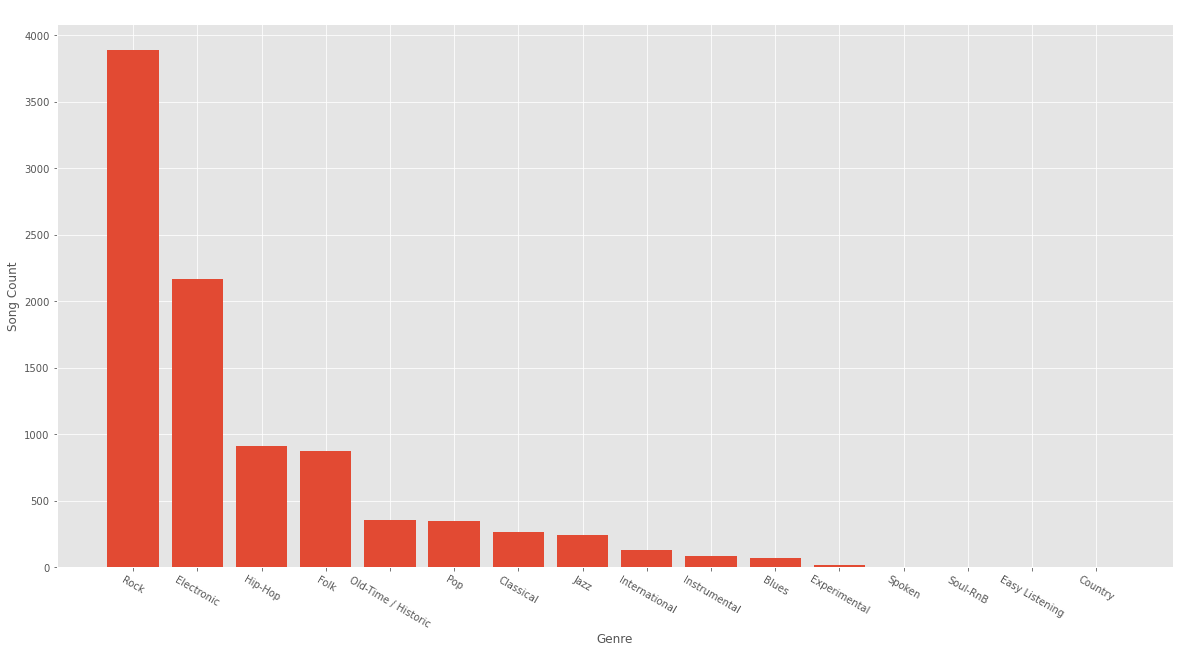

In [172]:
fig, ax = plt.subplots(figsize = (20,10))
ax.bar(echonest_tracks.track.genre_top.value_counts().index, echonest_tracks.track.genre_top.value_counts())
ax.set_xticklabels(echonest_tracks.track.genre_top.value_counts().index, rotation = 330)
ax.set_title('Genre Counts')
ax.set_xlabel('Genre')
ax.set_ylabel('Song Count');

In [134]:
dfs = [hip_hop_df, rock_df, classical_df , pop_df, electronic_df, folk_df]
names = ['Hip-Hop', 'Rock', 'Classical', 'Pop', 'Electronic','Folk']

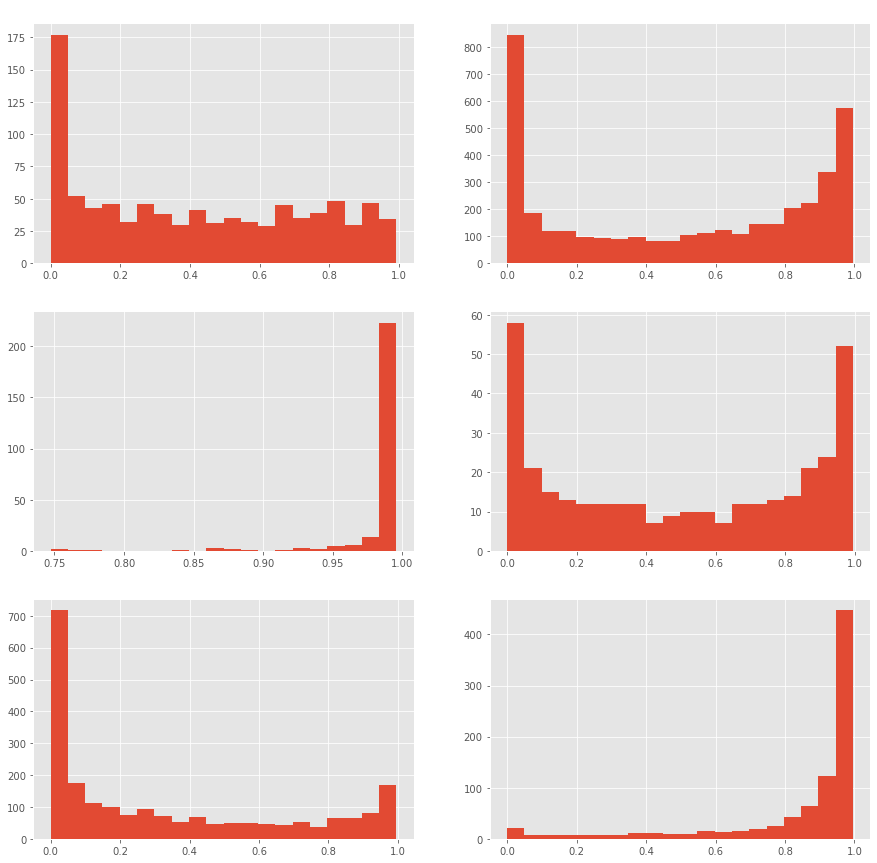

In [173]:
plot_genre_attribute_hist(dfs, 'acousticness', names)

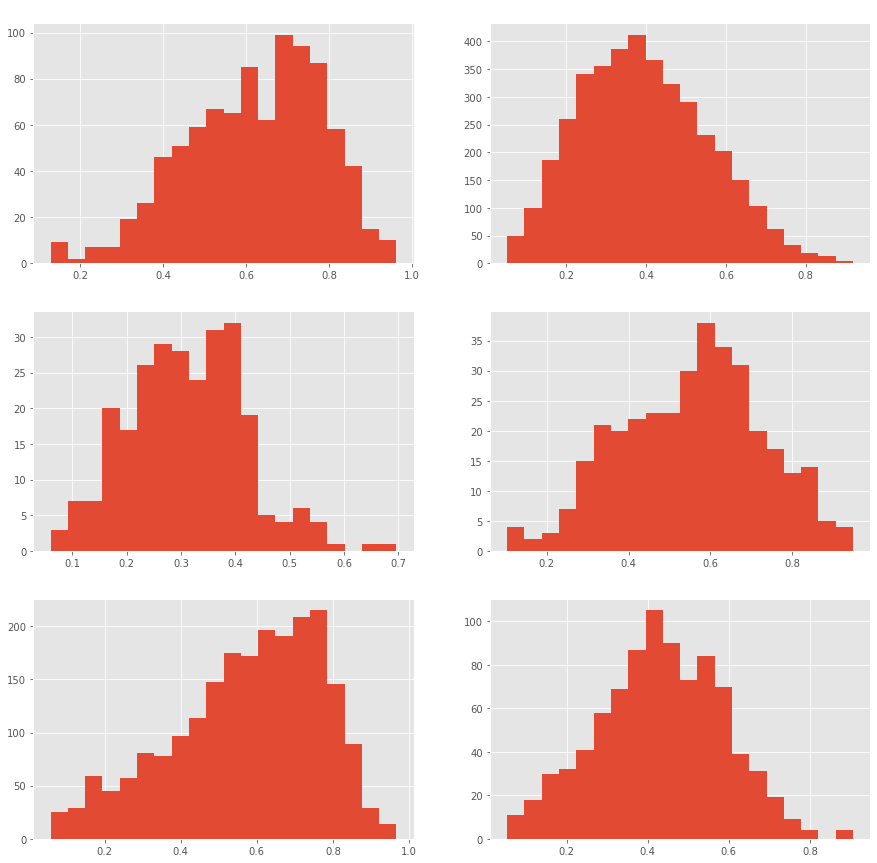

In [174]:
plot_genre_attribute_hist(dfs,'danceability', names)

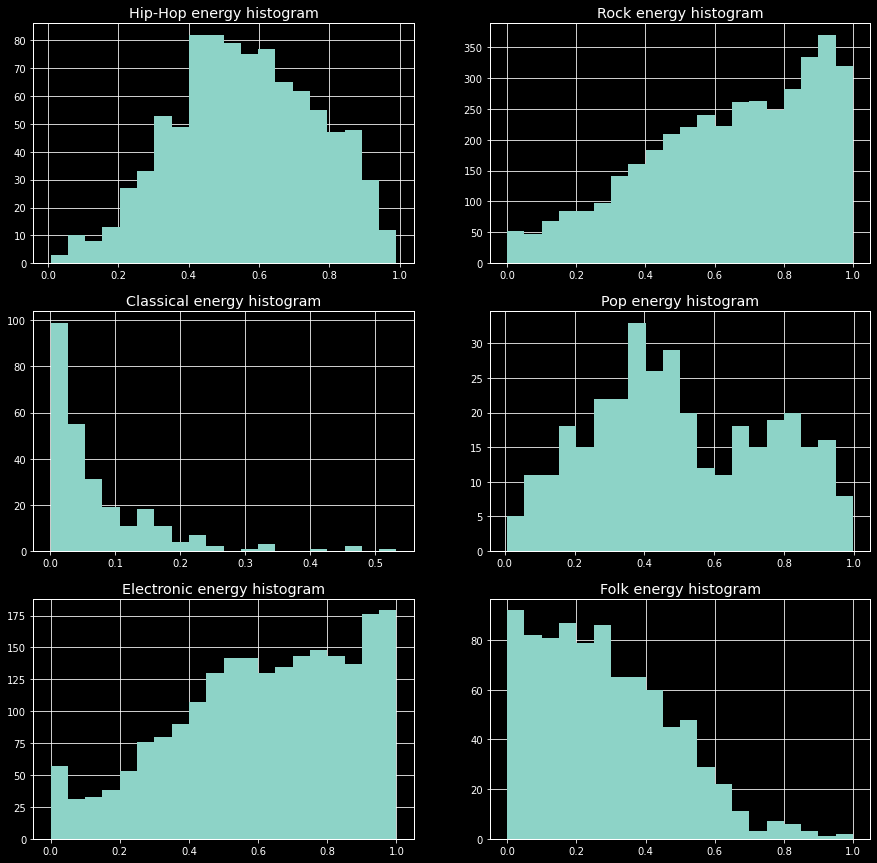

In [170]:
plot_genre_attribute_hist(dfs, 'energy', names)

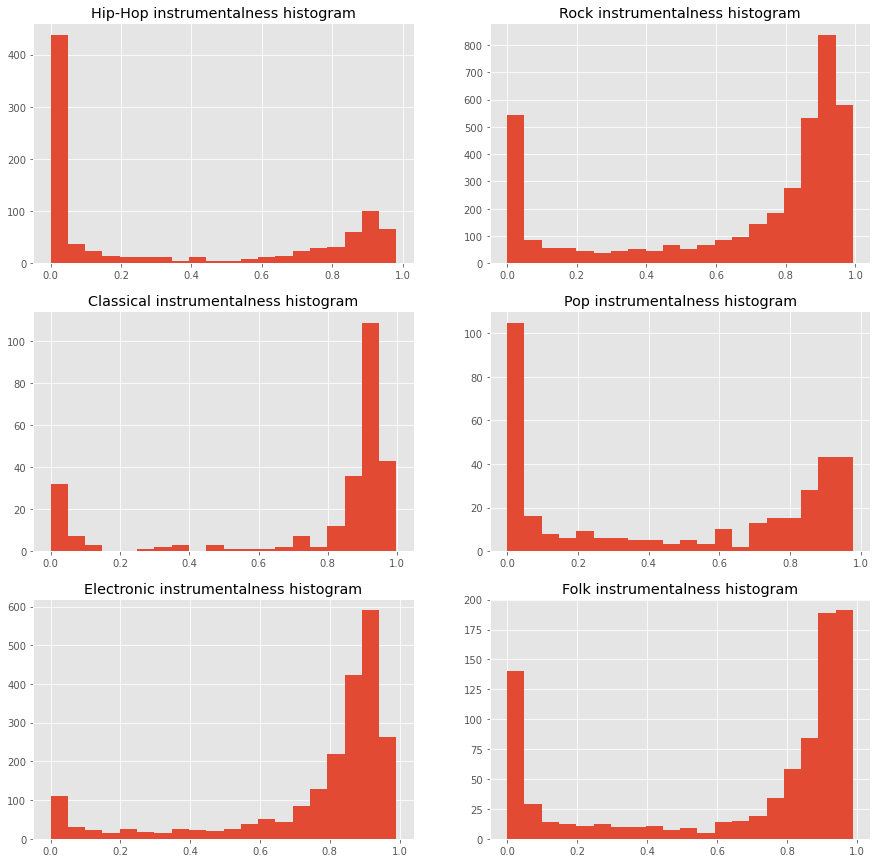

In [138]:
plot_genre_attribute_hist(dfs, 'instrumentalness', names)

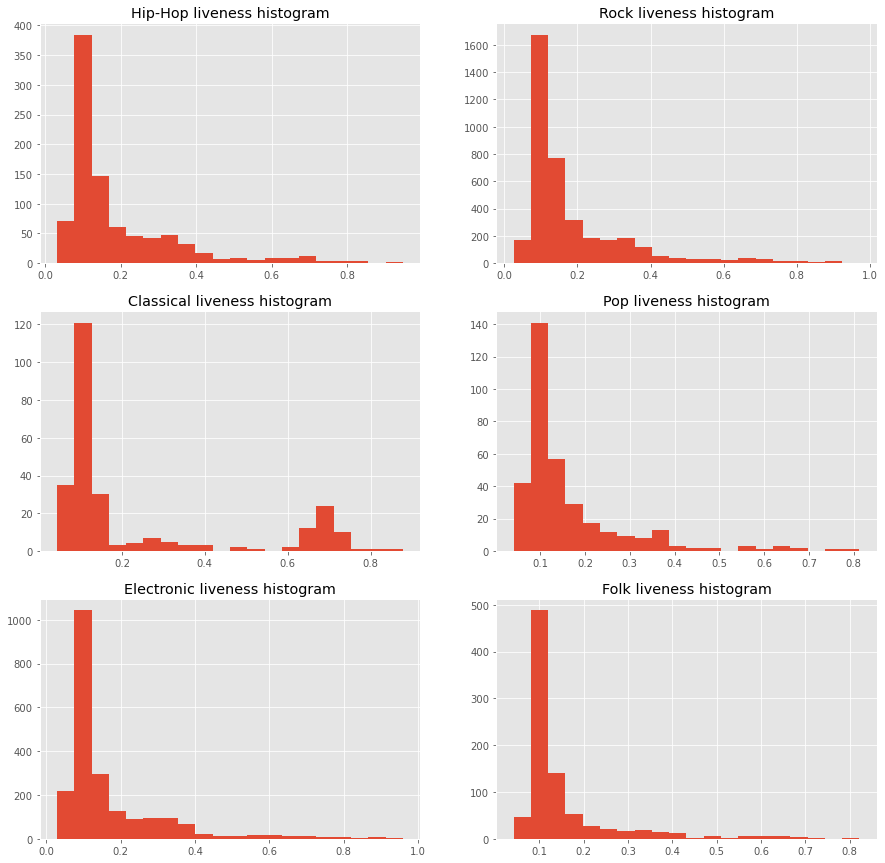

In [140]:
plot_genre_attribute_hist(dfs, 'liveness', names)

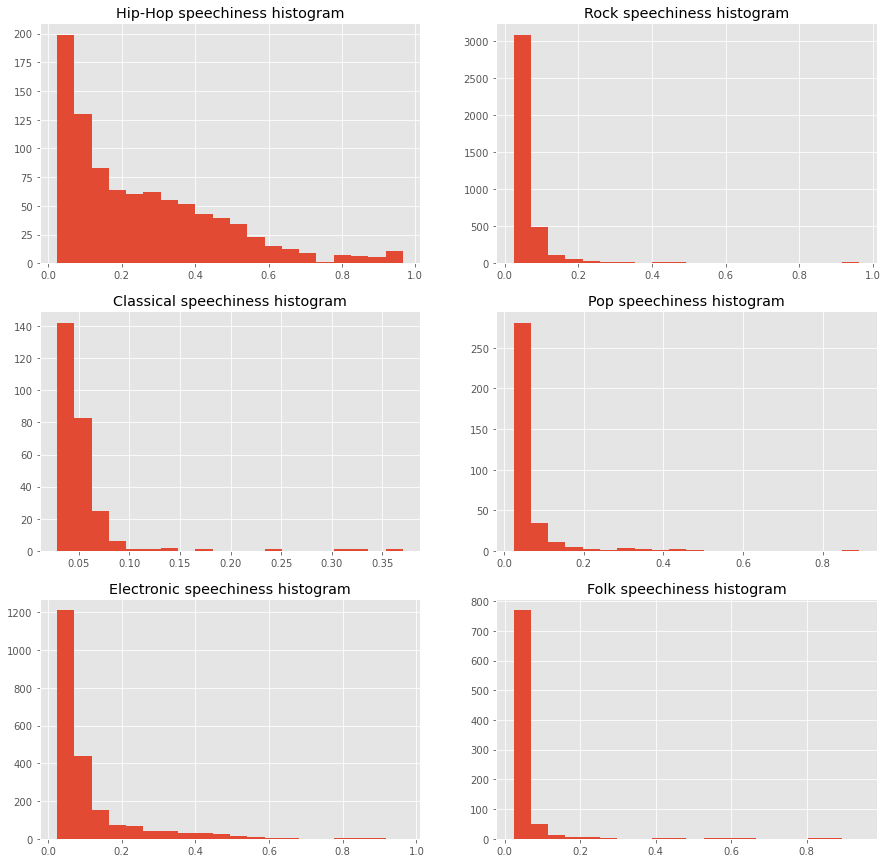

In [141]:
plot_genre_attribute_hist(dfs, 'speechiness', names)

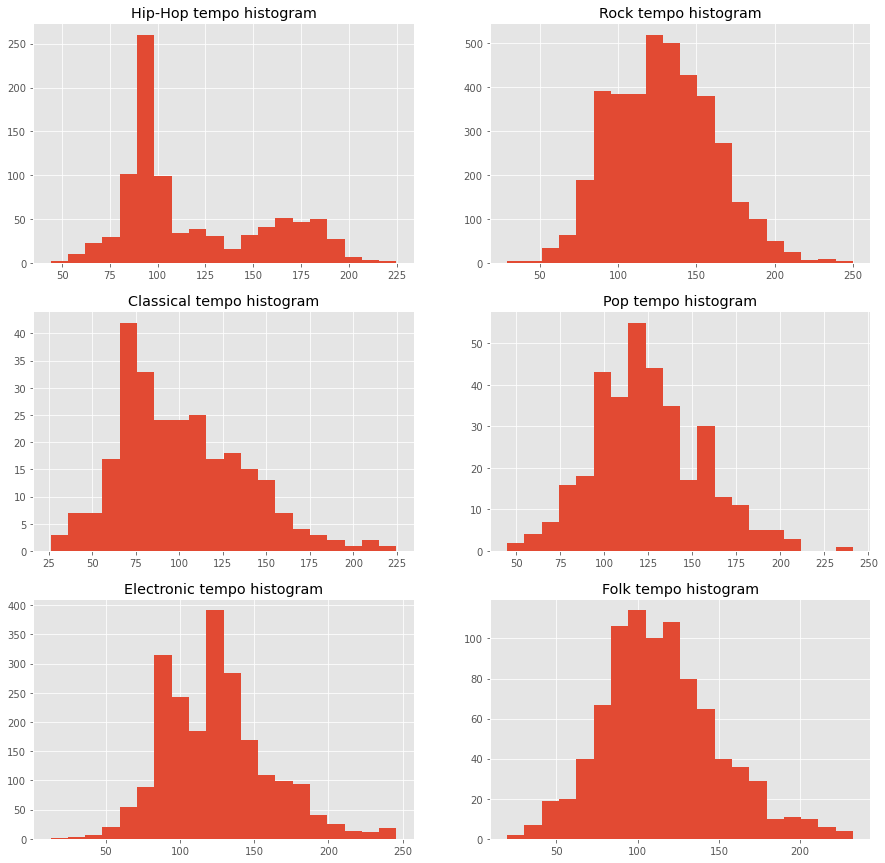

In [142]:
plot_genre_attribute_hist(dfs, 'tempo', names)

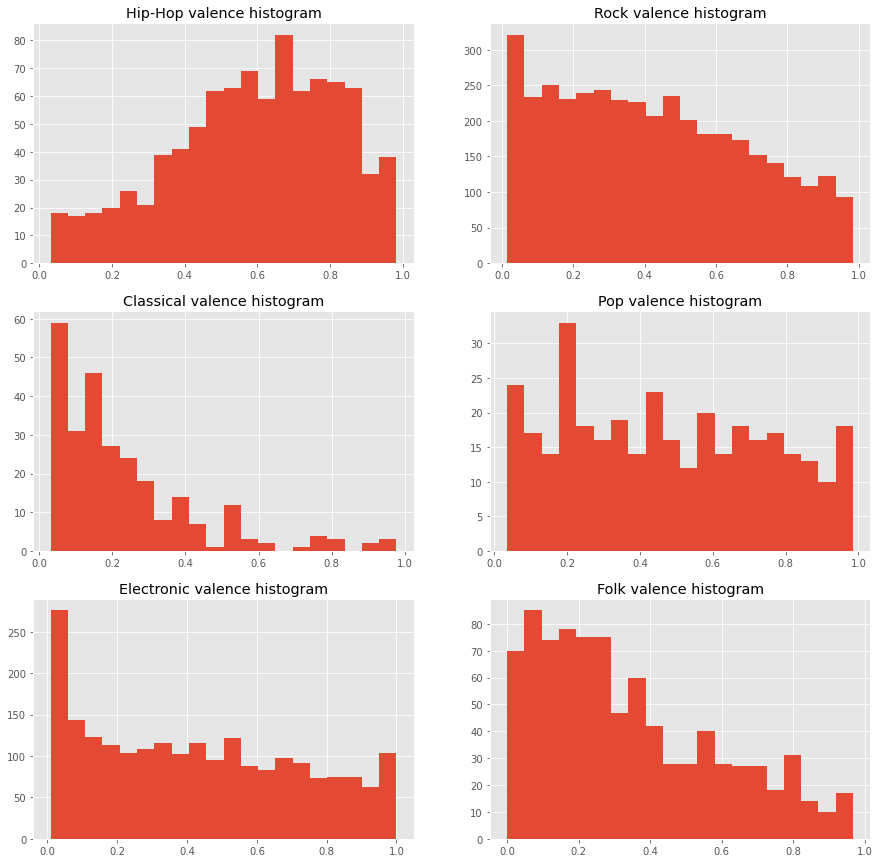

In [143]:
plot_genre_attribute_hist(dfs, 'valence', names)